# Merging data

https://carmengg.github.io/eds-220-book/lectures/lesson-10-merge-data.html

"Joins"
- inner join: merge subset of rows that have matches in both the left and right table, if they dont have matches, they aren't included

- left join: takes all rows from left table and merges on the data from matching rows in the right table, keys that dont match keep the row but add an na

- right join: like left, but for right. 

Our goal in this lesson will be to join two datasets, one with demographic information and another with country outlines, to create the following choropleth map showing the number of Arctic communities by country and their location in Scandinavia:

## Data

We will use two datasets in this lesson. 

The **first dataset** is Natural Earth’s medium scale cultural boundaries data (1:50m). We can obtain this dataset by downloading the shapefile. Natural Earth is a public domain dataset with ready-to-use data for creating maps. https://www.naturalearthdata.com/downloads/50m-cultural-vectors/

The **second dataset** we will use is a list of Arctic communities and their location (Brook, 2023) which can be accessed through the DataONE repository. https://search.dataone.org/view/doi%3A10.18739%2FA28S4JQ80

This is a GeoJSON file with the following attributes:
name: name of Arctic community,
population: population of Arctic community, as of 2022
country: country that the Arctic community falls within (see dataset metadata for the codes)
geoname-id: numeric codes that uniquely identify all administrative/legal and statistical geographic areas for which the Census Bureau tabulates data

## Data prep

1. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# The Natural Earth dataset has many columns, so we need to update the pandas display settings to show all columns:

# display all column when looking at dataframes
pd.set_option("display.max.columns", None)

## Countries

Now we move on to preparing the polygons for the Scandinavian countries. To import the Natural Earth countries polygons we use the geopandas.read_file() function again:

In [4]:
# import countries polygons
countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,NaN,Zimb.,ZW,Republic of Zimbabwe,NaN,Zimbabwe,NaN,NaN,Zimbabwe,NaN,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,NaN,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,NaN,Admin-0 country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,NaN,Zambia,ZM,Republic of Zambia,NaN,Zambia,NaN,NaN,Zambia,NaN,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,NaN,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,NaN,Admin-0 country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,NaN,Yem.,YE,Republic of Yemen,NaN,Yemen,NaN,NaN,"Yemen, Rep.",NaN,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425002,23425002,Exact WOE match as country,YEM,NaN,YEM,YEM,YEM,YEM,YEM,YEM,YEM,YEM,Y

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

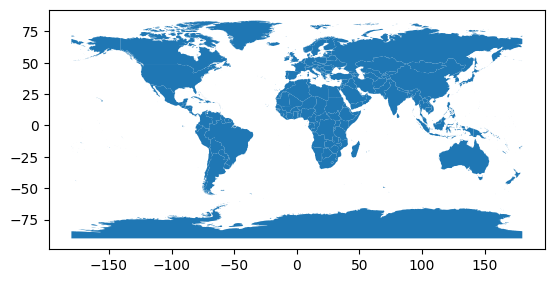

In [5]:
# quick view
countries.plot()

Notice the column names are in all caps. It is easier to work with column names in small caps because we don’t need to be pressing shift or capslock. We can do this update like this:

In [6]:
# re-assign the column names: .str.lower() makes them lower case
countries.columns = countries.columns.str.lower()
print(countries.columns)

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)


Finally, we have too many columns, so let’s only keep a few:

In [7]:
# remeber: the geometry column has the polygons for each country
countries_sub = countries[['admin','type','geometry']]
countries_sub.head()

,admin,type,geometry
0,Zimbabwe,Sovereign country,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,Sovereign country,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,Sovereign country,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,Sovereign country,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,Sovereign country,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
